In [1]:
import pandas as pd
import sqlite3

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mplfinance as mpf
import matplotlib.dates as mdates

In [2]:
def load_db_data():
    chunks = pd.read_csv('btceUSD.csv', chunksize=400000)
    for chunk in chunks:
        chunk.columns = ['Unix', 'Price', 'Volume']
        with sqlite3.connect('newdatabase.db') as conn:
            chunk.to_sql('Bitcoin', conn, if_exists='append')
            
load_db_data()

In [3]:
def pull_from_DB():
    with sqlite3.connect('newdatabase.db') as conn:
        df = pd.read_sql('SELECT * FROM Bitcoin LIMIT 10000', con =conn, 
                         index_col="index", columns = ['unix', 'price', 'volume'] )
        return df
    
df_data = pull_from_DB()
df_data.head()

,Unix,Price,Volume
index,,,
0,1313334917,10.4,0.101
1,1313334917,10.4,0.316
2,1313340309,10.5,1.800
3,1313340309,10.5,0.150
4,1313340895,10.5,2.110


In [4]:
df_data['Date'] = pd.to_datetime(df_data['Unix'], unit='s')
df_data.set_index('Date', inplace=True)

In [5]:
del(df_data['Unix'])

In [6]:
df_data.head()

,Price,Volume
Date,,
2011-08-14 15:15:17,10.4,0.101
2011-08-14 15:15:17,10.4,0.316
2011-08-14 16:45:09,10.5,1.800
2011-08-14 16:45:09,10.5,0.150
2011-08-14 16:54:55,10.5,2.110


In [7]:
ohlc = df_data['Price'].resample('1D').ohlc()

In [8]:
ohlc.head()

,open,high,low,close
Date,,,,
2011-08-14,10.40,11.00,10.00,10.00
2011-08-15,11.00,11.90,10.00,11.90
2011-08-16,11.20,11.47,10.82,11.10
2011-08-17,10.83,11.00,10.00,10.50
2011-08-18,10.30,10.88,10.30,10.49


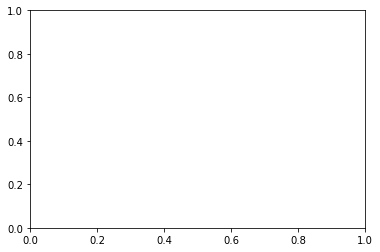

In [9]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))

In [14]:
ohlc['2MA'] = ohlc['close'].resample('2D').mean()


In [20]:
ohlc.head()

,open,high,low,close,2MA,5MA
Date,,,,,,
2011-08-14,10.40,11.00,10.00,10.00,10.950,10.798
2011-08-15,11.00,11.90,10.00,11.90,NaN,NaN
2011-08-16,11.20,11.47,10.82,11.10,10.800,NaN
2011-08-17,10.83,11.00,10.00,10.50,NaN,NaN
2011-08-18,10.30,10.88,10.30,10.49,10.895,NaN


In [17]:
del(ohlc['10MA'])

In [19]:
ohlc['5MA'] = ohlc['close'].resample('5D').mean()